In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
    
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
 
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm

In [2]:
 # create a differenced series- get only random fluctuations
# this is like substracting the next value with previous
def difference(dataset, interval=1): # interval =1:default argument,remains 1 till change the value
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return (diff)

In [10]:
# Create large images!
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(14, 8)) # was 16,12
plt.rc("font", size=13)

# UK visits abroad

In [4]:
import pip
#pip.main(["install", "openpyxl"])

In [5]:
import glob
import pandas as pd

# get data file names
path =r'D:\Ishangi_comeback\Aegis\Aegis_Advanced_Stats\Final_Assignment\Raw_data'
filenames = glob.glob(path + "/*.xlsx")

dfs = []

for df in dfs: 
    xl_file = pd.ExcelFile(filenames)

In [6]:
UK = pd.read_excel("UK visits abroad.xlsx") # data is taken every day
UK.head(20)

,Year,UK visits abroad: All visits Thousands - SA
0,1986 JAN,1878
1,1986 FEB,1743
2,1986 MAR,2014
3,1986 APR,1944
4,1986 MAY,2207
5,1986 JUN,2065
6,1986 JUL,2135
7,1986 AUG,2179
8,1986 SEP,2195
9,1986 OCT,2184


In [7]:
UK.isnull().sum() # check for null values

Year                                           0
UK visits abroad: All visits Thousands - SA    0
dtype: int64

In [8]:
UK.shape

(411, 2)

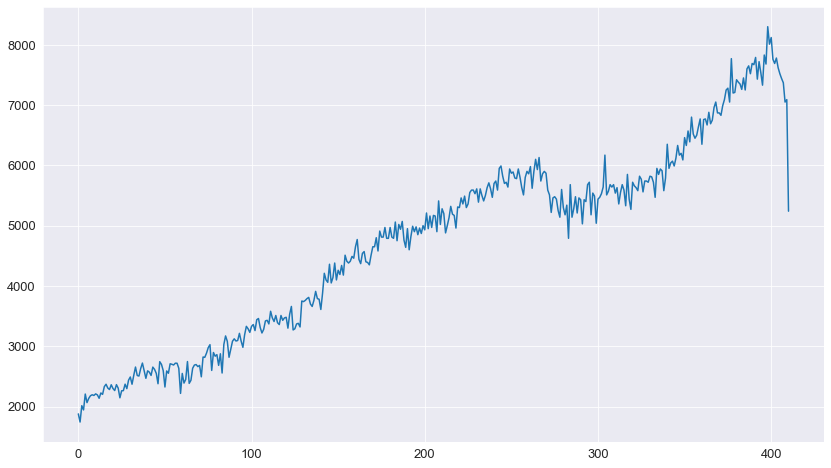

In [11]:
plt.plot(UK['UK visits abroad: All visits Thousands - SA'])

In [12]:
# covid impacted travelling plans, so last drop is seen due to that, not considered in the analysis
df_UK_1=UK.iloc[:-3,:] # the last 3 data points have been removed
df_UK=df_UK_1['UK visits abroad: All visits Thousands - SA']
df_UK.head(20)

0     1878
1     1743
2     2014
3     1944
4     2207
5     2065
6     2135
7     2179
8     2195
9     2184
10    2210
11    2193
12    2137
13    2225
14    2202
15    2330
16    2370
17    2307
18    2282
19    2361
Name: UK visits abroad: All visits Thousands - SA, dtype: int64

In [13]:
sm.tsa.stattools.adfuller(df_UK)

#IN ADF test, H0: Data is NOT STATIONARY
#             H1: Data is STATIONARY

#In result, 2nd value is p-value which is >0.05 hence, Null hypothesis can not be rejected(H0: Data is NOT STATIONARY).

(-0.21933594410364446,
 0.9361772343080957,
 17,
 390,
 {'1%': -3.4472291365835566,
  '5%': -2.8689795375849223,
  '10%': -2.5707330834976987},
 5120.763745303004)

In [14]:
#detrend without log
df_diff1 = difference(df_UK, 1)

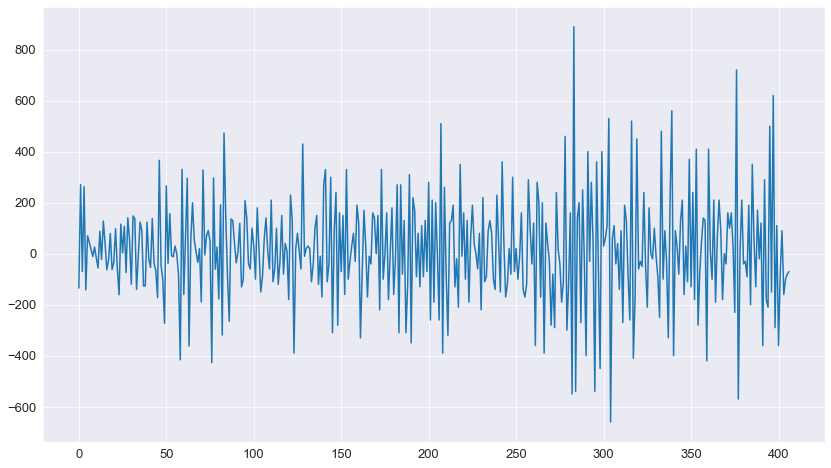

In [15]:
plt.plot(df_diff1)

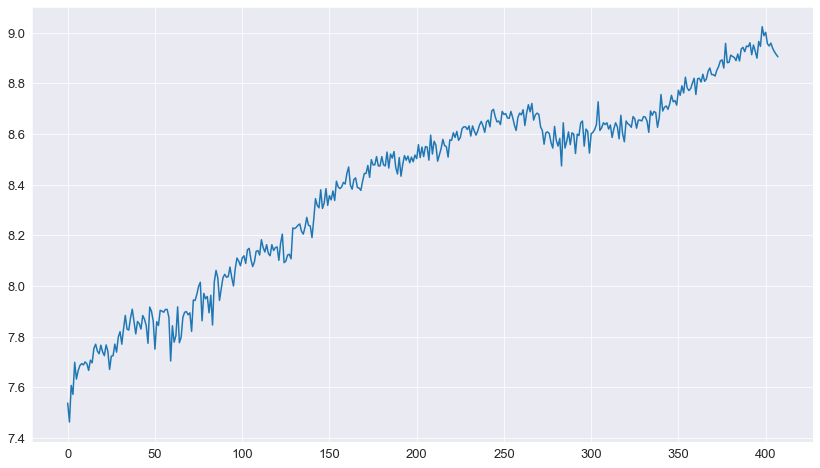

In [16]:
#since we see steady increase in variation, converting the data to log
df_log=np.log(df_UK)
plt.plot(df_log)

In [17]:
# De-trend once after log
df_log_diff1 = difference(df_log, 1)
#no seasonality in the data

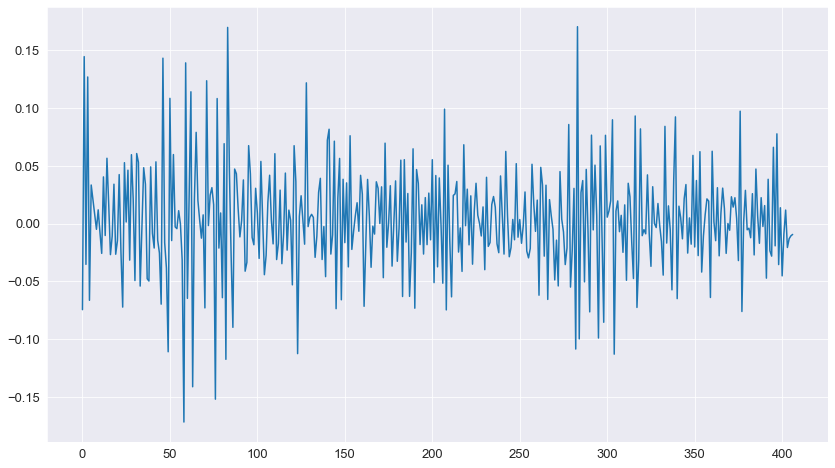

In [18]:
plt.plot(df_log_diff1)


In [19]:
# Running thorugh ADF again to check if data is stationary, because now visually the mean betweeen 2 time windows seems to be stationary
# there is no seen seasonality in the data
# Run ADF tests on the de-trended data

sm.tsa.stattools.adfuller(df_log_diff1)

# We observe that the p-value is < 0.05, thereby rejecting the NULL hypothesis of NON STATIONARITY
# Therefore the series is now STATIONARY

(-5.387542260429908,
 3.5973659053989736e-06,
 16,
 390,
 {'1%': -3.4472291365835566,
  '5%': -2.8689795375849223,
  '10%': -2.5707330834976987},
 -1411.2999500958867)

In [20]:
# Creating STL decomposition
from statsmodels.tsa.seasonal import STL

In [21]:
stl = STL(df_UK, period=12) # period 12 since its monthly data


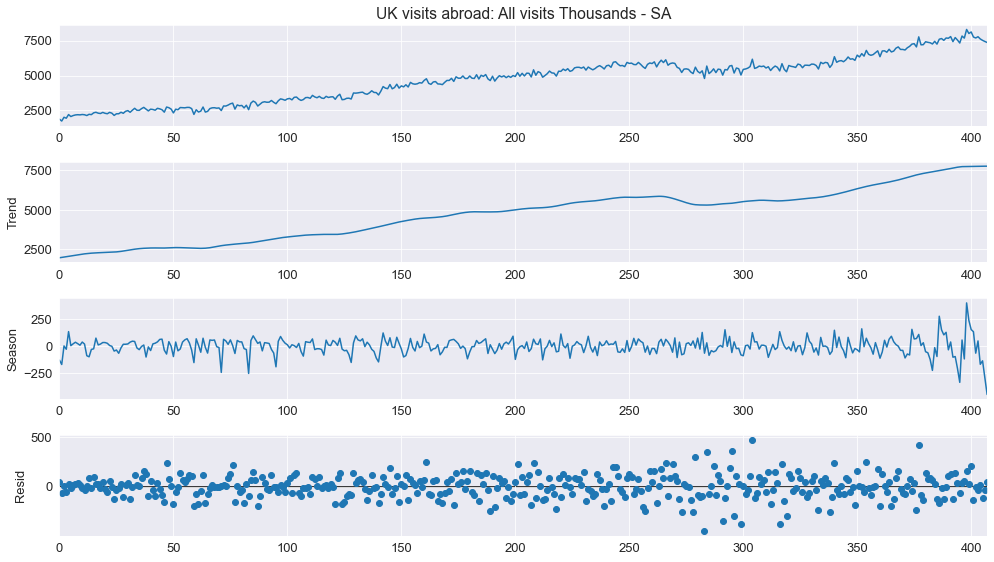

In [22]:
res = stl.fit()
fig = res.plot()

Split data into train and test (70-30)

In [23]:
#from sklearn.model_selection import train_test_split
# this will not work, because, it will take the data randomly and break the sequence

ratio = len(df_UK)*7//10 # taking 70-30 split for train and test
train_UK = df_UK.iloc[:ratio,]
test_UK=df_UK.iloc[ratio:,]



In [24]:
train_UK.shape

(285,)

In [25]:
train_UK

0      1878
1      1743
2      2014
3      1944
4      2207
       ... 
280    5300
281    5180
282    5340
283    4790
284    5680
Name: UK visits abroad: All visits Thousands - SA, Length: 285, dtype: int64

In [24]:
test_crude

101    242677
102    245369
103    245611
104    219708
105    238109
106    230230
107    241245
108    248552
109    209942
110    236216
111    247608
112    242857
113    254283
114    246671
115    247656
116    227795
117    227975
118    226251
119    219240
120    234307
121    178257
122    210276
123    209958
124    221259
125    214563
126    215083
127    215273
128    194485
129    193493
130    174531
131    211837
132    198663
133    189060
134    195181
135    165586
136    188693
137    191919
138    183087
139    168406
140    161926
141    164494
142    168655
143    178597
144    181197
Name: Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels), dtype: int64

In [26]:
test_UK.shape

(123,)

# M1- ARIMA

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


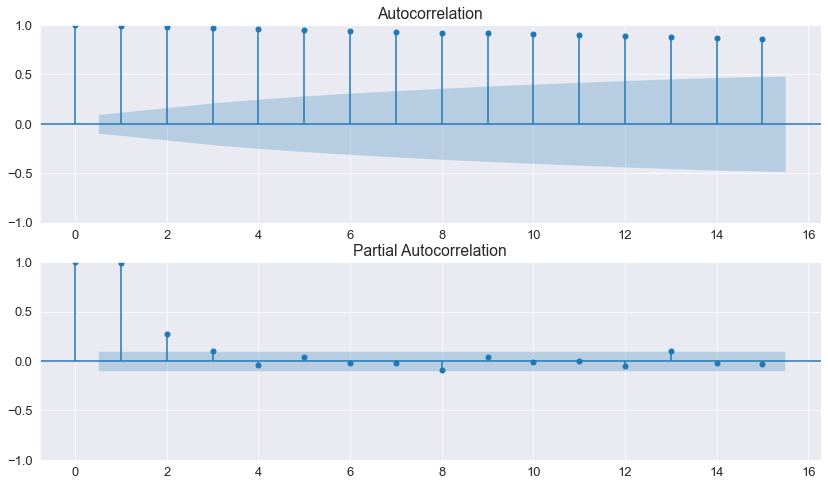

In [28]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_UK, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_UK, lags=15, ax=ax2)

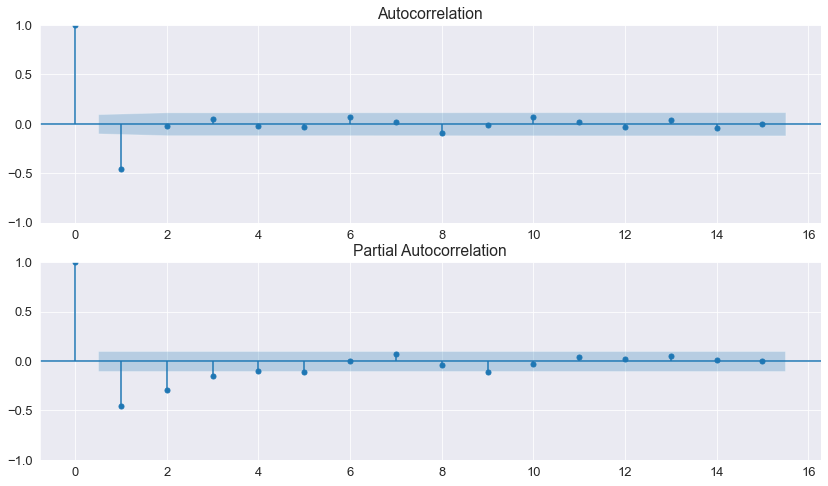

In [29]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_log_diff1, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_log_diff1, lags=15, ax=ax2)

In [30]:
#Compute information criteria for many ARMA models.
#Each ic is an attribute with a DataFrame for the results. The AR order used is the row index. 
#The MA order used is the column index. The minimum orders are available as ic_min_order
sm.tsa.stattools.arma_order_select_ic(df_log_diff1)

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  wa

{'bic':              0            1            2
 0 -1316.946106 -1458.354893 -1452.352271
 1 -1405.924063 -1452.345885 -1446.394075
 2 -1436.538120 -1446.710639 -1440.827953
 3 -1439.279010 -1440.842407 -1422.732080
 4 -1437.606700 -1434.994903 -1414.962029,
 'bic_min_order': (0, 1)}

In [93]:
# As per the ACF, PACF plot, p=0,q=1, We will not take the p=4 as it is insignificant and leseer values define the model better
# Also, as per above function, bic_min_order': (0, 1) which ,says p=0, q=1
# The AIC and BIC for p=0,q=1 is minimum as compared to other values and p-value is significant
# Conclusion: It is a model explained by Moving average
M1 = sm.tsa.arima.ARIMA(train_UK,order=(0,1,1),seasonal_order=(0,0,0,0))
M1_res = M1.fit()
M1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                            
=======================================================================================================
Dep. Variable:     UK visits abroad: All visits Thousands - SA   No. Observations:                  285
Model:                                          ARIMA(0, 1, 1)   Log Likelihood               -1839.846
Date:                                         Mon, 29 Aug 2022   AIC                           3683.692
Time:                                                 23:38:19   BIC                           3690.990
Sample:                                                      0   HQIC                          3686.618
                                                         - 285                                         
Covariance Type:                                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5865      0.042    -13.818      0.000      -0.670      -0.503
sigma2       2.48e+04   1867.661     13.279      0.000    2.11e+04    2.85e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                11.27
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

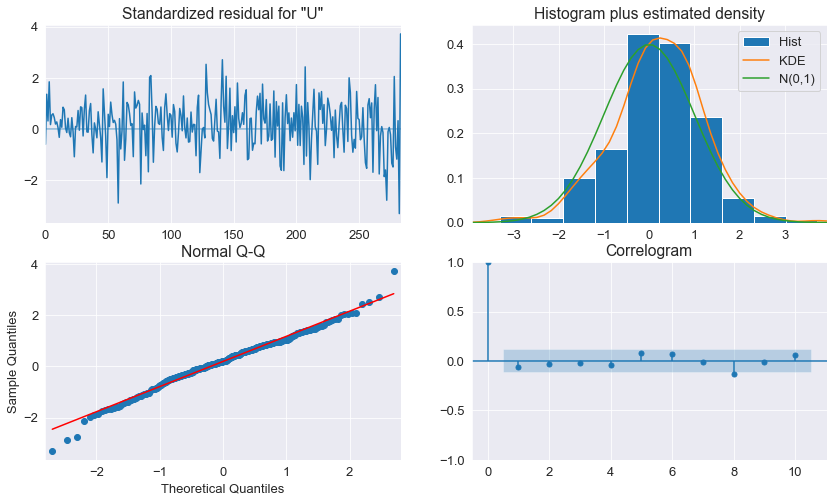

In [94]:
pred = M1_res.plot_diagnostics()

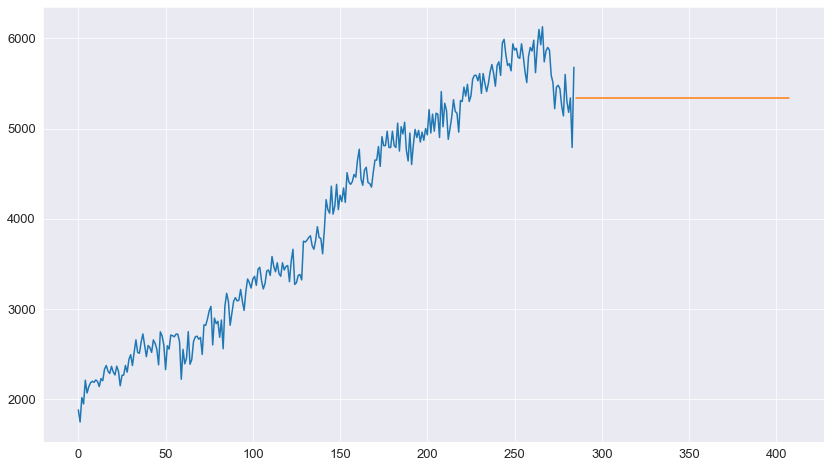

In [95]:
tforecast =  M1_res.forecast(123)# 123 is the test size, so forecasting for the same 
plt.plot(train_UK)
plt.plot(tforecast)

In [96]:
tforecast

285    5336.775538
286    5336.775538
287    5336.775538
288    5336.775538
289    5336.775538
          ...     
403    5336.775538
404    5336.775538
405    5336.775538
406    5336.775538
407    5336.775538
Name: predicted_mean, Length: 123, dtype: float64

In [97]:
tpredict =  M1_res.predict(1)
tpredict

1      1851.563359
2      1790.670438
3      1893.434297
4      1915.131612
5      2037.362468
          ...     
280    5410.395967
281    5364.751867
282    5288.364723
283    5309.713743
284    5094.833920
Name: predicted_mean, Length: 284, dtype: float64

In [98]:
train_UK

0      1878
1      1743
2      2014
3      1944
4      2207
       ... 
280    5300
281    5180
282    5340
283    4790
284    5680
Name: UK visits abroad: All visits Thousands - SA, Length: 285, dtype: int64

In [99]:
#manually calculating the RMSE for train dataset
((train_UK[1:]-tpredict)**2).mean()

24795.967988863536

In [100]:
import math
math.sqrt(24795.967988863536)

157.4673553117075

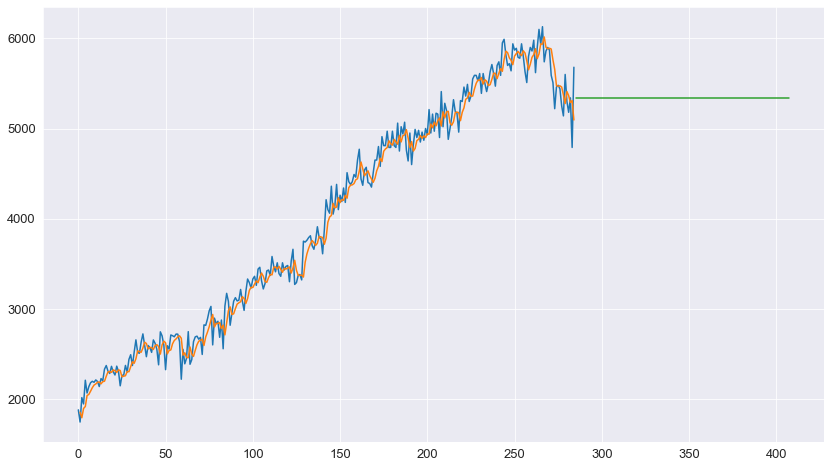

In [101]:
plt.plot(train_UK) # blue
plt.plot(tpredict)#orange
plt.plot(tforecast) #green

In [102]:
tforecast2 = M1_res.get_forecast(123)
confint = np.array(tforecast2.conf_int())

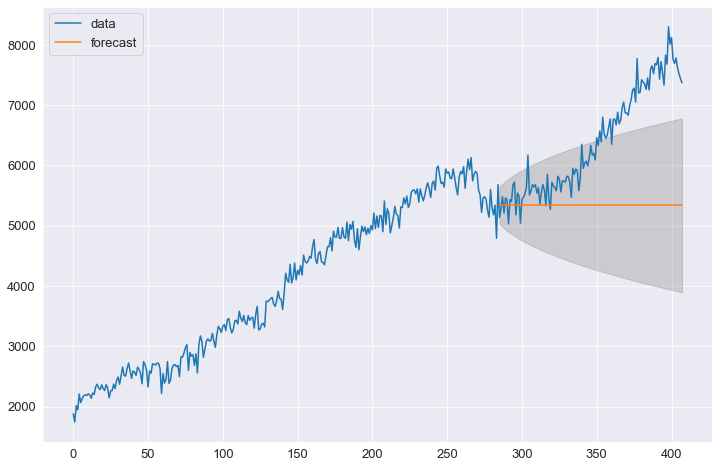

In [103]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_UK.index, df_UK, label='data')
ax.plot(tforecast2.predicted_mean.index, tforecast2.predicted_mean, label='forecast')
ax.fill_between(tforecast2.predicted_mean.index, confint[:,0], confint[:,1],color='gray',alpha=0.3)
ax.legend()

In [104]:
test_UK

285    5140
286    5280
287    5480
288    5210
289    5460
       ... 
403    7780
404    7620
405    7520
406    7440
407    7370
Name: UK visits abroad: All visits Thousands - SA, Length: 123, dtype: int64

In [105]:
#RMSE for test data for M1(ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_UK,tforecast,squared=False)
RMSE

1363.9705842054427

In [106]:
# Calculating R-Squared to evaluate the model
#The ideal value for R-squared is 1 for best fit model
#Value of R-square can also be negative when the model fitted is worse than the average fitted model. 

from sklearn.metrics import r2_score

r2 = r2_score(test_UK, tforecast)
r2

-1.4819040070056535

# M2- AutoARIMA

In [107]:
 #!pip install pmdarima

In [108]:
import pmdarima as pm

In [109]:
M2 = pm.auto_arima(train_UK,start_p=0, start_q=0,
                             max_p=5, max_q=5, m=12,
                             start_P=0, seasonal=False,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3769.686, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3705.767, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3674.209, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3769.198, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3676.097, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3676.090, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3683.692, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.027 seconds


In [110]:
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  285
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1834.104
Date:                Mon, 29 Aug 2022   AIC                           3674.209
Time:                        23:39:09   BIC                           3685.156
Sample:                             0   HQIC                          3678.597
                                - 285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.1783      3.537      3.443      0.001       5.246      19.110
ma.L1         -0.6400      0.036    -17.635      0.000      -0.711      -0.569
sigma2      2.377e+04   1707.872     13.916      0.000    2.04e+04    2.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                13.21
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

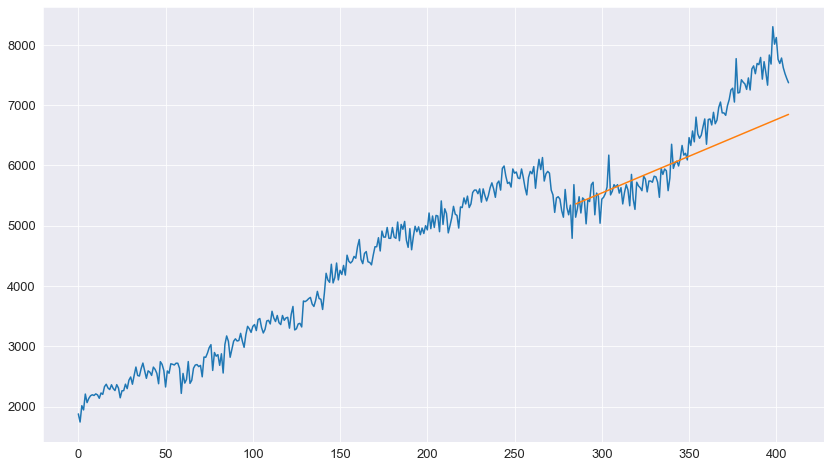

In [111]:
M2.fit(train_UK) #blue
fc = M2.predict(123) #orange
plt.plot(df_UK)
plt.plot(np.arange(285,285+123,1),fc)

In [112]:
fc

285    5359.385181
286    5371.563506
287    5383.741831
288    5395.920156
289    5408.098482
          ...     
403    6796.427564
404    6808.605889
405    6820.784215
406    6832.962540
407    6845.140865
Length: 123, dtype: float64

In [113]:
#RMSE for test data for M2 (Auto-ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_UK,fc,squared=False)
RMSE

553.1576726971075

In [114]:
from sklearn.metrics import r2_score

r2 = r2_score(test_UK, fc)
r2

0.5918001384200311

# M3- Holts Winter's Model

# Simple Exponential Smoothing: Level 

In [115]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [116]:
ses = SimpleExpSmoothing(train_UK)

In [117]:
type(ses)

statsmodels.tsa.holtwinters.model.SimpleExpSmoothing

In [118]:
result1 = ses.fit(smoothing_level=0.5, optimized=False)

In [119]:
result1.summary()

Dep. Variable:,UK visits abroad: All visits Thousands - SA,No. Observations:,285
Model:,SimpleExpSmoothing,SSE,7119442.364
Optimized:,False,AIC,2889.867
Trend:,None,BIC,2897.172
Seasonal:,None,AICC,2890.010
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,23:39:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,1878.0000,l.0,False


In [120]:
pred1 = result1.predict(start=1, end=411)

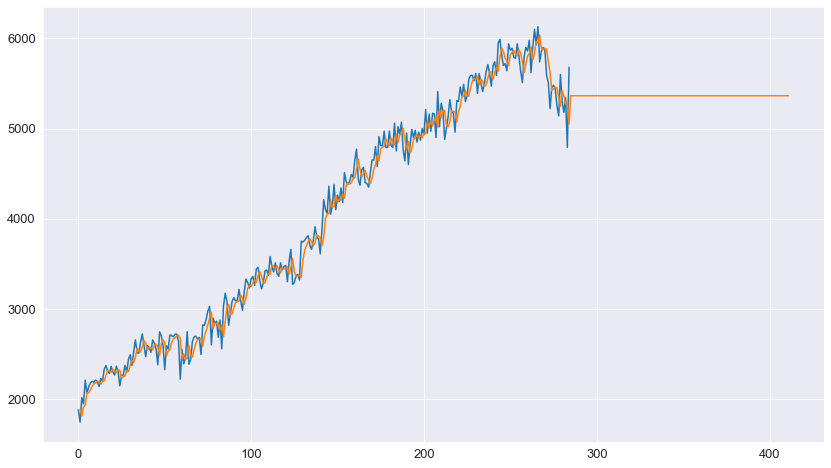

In [121]:
plt.plot(train_UK)
plt.plot(pred1)

In [122]:
result1.params

{'smoothing_level': 0.5,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 1878.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

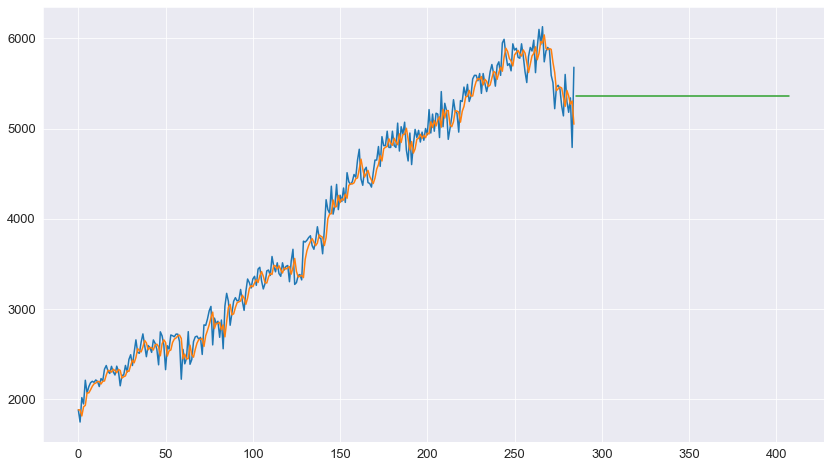

In [123]:
plt.plot(train_UK)
plt.plot(result1.fittedvalues)
plt.plot(result1.forecast(123))

In [140]:
result2 = ses.fit(smoothing_level=0.3, optimized=False) # optimize the values of alpha from 0.5 to 0.6

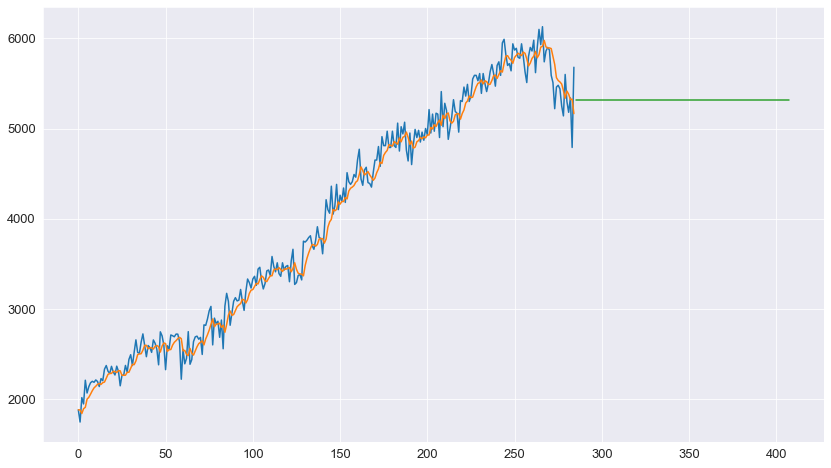

In [141]:
plt.plot(train_UK)
plt.plot(result2.fittedvalues)
plt.plot(result2.forecast(123))
# the model is better fitted when we increase the alpha from 0.5 to 0.8 i.e. the model is better explained by the recent observed value of alpha as compared to previous values

In [142]:
result2.params

{'smoothing_level': 0.3,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 1878.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Holt's linear trend values: Level+Trend

In [143]:
from statsmodels.tsa.holtwinters import Holt

In [144]:
model = Holt(train_UK)
result3 = model.fit()
result3.params

{'smoothing_level': 0.422006799205831,
 'smoothing_trend': 0.11852894407276232,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1880.6607699962049,
 'initial_trend': 30.64378893606115,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [145]:
result3.summary()

Dep. Variable:,UK visits abroad: All visits Thousands - SA,No. Observations:,285
Model:,Holt,SSE,7149830.903
Optimized:,True,AIC,2895.081
Trend:,Additive,BIC,2909.691
Seasonal:,None,AICC,2895.384
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,23:43:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4220068,alpha,True
smoothing_trend,0.1185289,beta,True


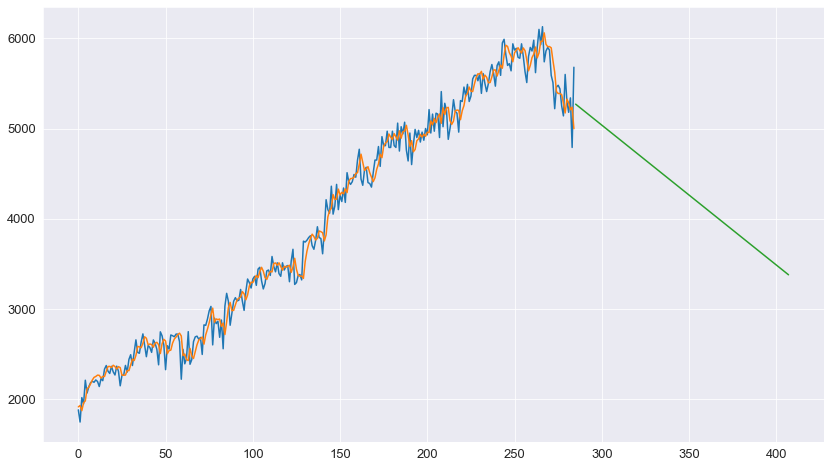

In [146]:
plt.plot(train_UK)
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(123))

# Final Holtz Winter Model: Level+Trend+Seasonality

In [147]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [148]:
model = ExponentialSmoothing(train_UK, trend='add')#, seasonal='add', seasonal_periods=12)
# seasonal = add as this is a additive model and not multiplicative as the amplitude is not changing

In [149]:
result4 = model.fit()
result4.params

{'smoothing_level': 0.3390120641640012,
 'smoothing_trend': 0.05820644450888004,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1816.4159873288736,
 'initial_trend': 21.77216279982603,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [150]:
result4.summary()

Dep. Variable:,UK visits abroad: All visits Thousands - SA,No. Observations:,285
Model:,ExponentialSmoothing,SSE,6828183.494
Optimized:,True,AIC,2881.963
Trend:,Additive,BIC,2896.573
Seasonal:,None,AICC,2882.265
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,23:44:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3390121,alpha,True
smoothing_trend,0.0582064,beta,True


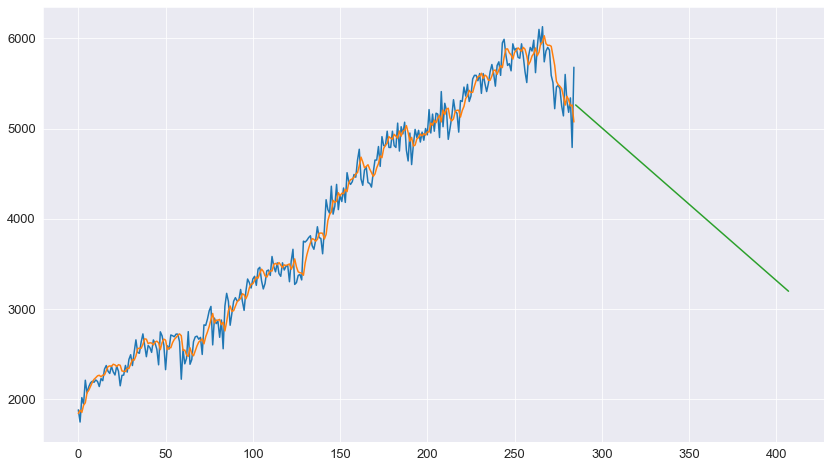

In [151]:
plt.plot(train_UK)
plt.plot(result4.fittedvalues)
plt.plot(result4.forecast(123))

In [152]:
result4.forecast(123)

285    5261.591359
286    5244.648161
287    5227.704963
288    5210.761765
289    5193.818567
          ...     
403    3262.293993
404    3245.350795
405    3228.407597
406    3211.464399
407    3194.521201
Length: 123, dtype: float64

In [153]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_UK,result4.forecast(123),squared=False)
RMSE

2604.1758234448776

In [154]:
from sklearn.metrics import r2_score

r2 = r2_score(test_UK, result4.forecast(123))
r2

-8.047228872061055

# Conclusion: Auto ARIMA model is the preferred model for this data as it is showing better R-squared value and better accuracy